#### OBJECTIVE:

- THE MAIN OBJECTIVE OF THIS PROJECT IS TO PREDICT THE FRAUDENTAL CASES

#### KEY INSIGHTS:

- THE DATA IS OF BOTH CATEGORICAL AND NUMERICAL DATA 

#### REGRESSION AND CLASSIFICATION ALGORITHMS TO BE USED:

- LOGISTIC REGRESSION
- DECISION TREE CLASSIFIER
- RANDOM FOREST CLASSIFIER
- GRADIENT BOOSTING CLASSIFIER
- ADA BOOST CLASSIFIER
- XGBM
- LGBM
- K NEAREST NEIGHBOUR CLASSIFIER
- SUPPORT VECTOR CLASSIFIER

#### 1.IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2. IMPORT DATASET

In [2]:
ins_data=pd.read_csv("C:\\Users\\PRIYANKA\\Downloads\\Insurance Dataset.csv")
ins_data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [3]:
ins_data['Result'].value_counts()

1    786407
0    262168
Name: Result, dtype: int64

#### 3. EXPLORATORY DATA ANALYSIS(EDA)

#### 3.1 PERFORMING INITIAL ANALYSIS

In [4]:
ins_data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [5]:
ins_data.shape

(1048575, 24)

In [6]:
ins_data.isna().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [7]:
ins_data.isnull().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [8]:
ins_data.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                              float64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                          object
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost            

In [9]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [10]:
#AREA SERVICE
ins_data['Area_Service'].unique()

array(['Western NY', nan, 'Finger Lakes', 'Central NY', 'Southern Tier',
       'Capital/Adirond', 'Hudson Valley', 'New York City'], dtype=object)

In [11]:
ins_data['Area_Service'].unique().size

8

In [12]:
#HOSPITAL COUNTRY
ins_data['Hospital County'].unique()

array(['Allegany', nan, 'Cattaraugus', 'Chautauqua', 'Erie', 'Genesee',
       'Niagara', 'Orleans', 'Wyoming', 'Chemung', 'Livingston', 'Monroe',
       'Ontario', 'Schuyler', 'Steuben', 'Wayne', 'Yates', 'Oswego',
       'Broome', 'Cayuga', 'Chenango', 'Cortland', 'Herkimer',
       'Jefferson', 'Lewis', 'Madison', 'Oneida', 'Onondaga',
       'St Lawrence', 'Tompkins', 'Albany', 'Clinton', 'Columbia',
       'Delaware', 'Essex', 'Franklin', 'Fulton', 'Montgomery', 'Otsego',
       'Rensselaer', 'Saratoga', 'Schenectady', 'Schoharie', 'Warren',
       'Dutchess', 'Orange', 'Putnam', 'Rockland', 'Sullivan', 'Ulster',
       'Westchester', 'Bronx'], dtype=object)

In [13]:
ins_data['Hospital County'].unique().size

52

In [14]:
#HOSPITAL ID
ins_data['Hospital Id'].unique()

array([3.700e+01,       nan, 3.900e+01, 6.600e+01, 9.800e+01, 1.020e+02,
       1.030e+02, 1.110e+02, 1.140e+02, 2.070e+02, 2.080e+02, 2.100e+02,
       2.110e+02, 2.130e+02, 2.150e+02, 2.160e+02, 2.180e+02, 2.670e+02,
       2.800e+02, 2.920e+02, 3.390e+02, 3.400e+02, 5.650e+02, 5.740e+02,
       5.810e+02, 5.830e+02, 5.850e+02, 7.180e+02, 1.153e+03, 3.067e+03,
       1.160e+02, 1.180e+02, 3.930e+02, 4.090e+02, 4.110e+02, 4.120e+02,
       4.130e+02, 4.140e+02, 4.610e+02, 4.710e+02, 6.710e+02, 6.760e+02,
       6.780e+02, 8.580e+02, 8.660e+02, 8.700e+02, 8.730e+02, 1.028e+03,
       1.158e+03, 5.785e+03, 1.200e+01, 4.200e+01, 4.300e+01, 5.800e+01,
       8.500e+01, 1.280e+02, 1.580e+02, 3.620e+02, 3.670e+02, 3.770e+02,
       3.790e+02, 3.830e+02, 3.970e+02, 4.010e+02, 5.890e+02, 5.970e+02,
       5.980e+02, 5.990e+02, 6.280e+02, 6.300e+02, 6.350e+02, 6.360e+02,
       7.270e+02, 7.980e+02, 8.040e+02, 8.120e+02, 8.150e+02, 8.170e+02,
       9.770e+02, 9.059e+03, 1.000e+00, 2.000e+00, 

In [15]:
ins_data['Hospital Id'].unique().size

144

In [16]:
#AGE
ins_data['Age'].unique()

array(['30 to 49', '70 or Older', '0 to 17', '18 to 29', '50 to 69'],
      dtype=object)

In [17]:
ins_data['Age'].unique().size

5

In [18]:
#GENDER
ins_data['Gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [19]:
ins_data['Gender'].unique().size

3

In [20]:
#CULTURAL GROUP
ins_data['Cultural_group'].unique()

array(['White', 'Other Race', 'Black/African American', 'Unknown'],
      dtype=object)

In [21]:
ins_data['Cultural_group'].unique().size

4

In [22]:
#ETHNICITY
ins_data['ethnicity'].unique()

array(['Not Span/Hispanic', 'Spanish/Hispanic', 'Unknown'], dtype=object)

In [23]:
ins_data['ethnicity'].unique().size

3

In [24]:
#DAYS SPENT IN HOSPITAL
ins_data['Days_spend_hsptl'].unique()

array(['4', '3', '1', '2', '5', '6', '14', '12', '9', '8', '10', '7',
       '22', '11', '16', '15', '25', '13', '17', '28', '18', '19', '23',
       '38', '20', '24', '26', '21', '27', '30', '29', '39', '87', '35',
       '37', '32', '55', '56', '49', '110', '69', '75', '42', '51', '47',
       '45', '46', '40', '34', '79', '43', '120 +', '65', '41', '31',
       '50', '59', '44', '36', '70', '115', '58', '94', '33', '68', '67',
       '54', '80', '85', '95', '78', '91', '88', '48', '52', '63', '57',
       '74', '64', '53', '62', '97', '72', '118', '81', '90', '86', '106',
       '112', '105', '114', '66', '89', '83', '84', '82', '93', '116',
       '71', '60', '73', '61', '92', '76', '96', '77', '104', '100',
       '103', '102', '117', '108', '99', '107', '98', '101', '119', '111',
       '109', '113'], dtype=object)

In [25]:
ins_data['Days_spend_hsptl'].unique().size

120

In [26]:
#ADMISSION TYPE
ins_data['Admission_type'].unique()

array(['Elective', 'Urgent', 'Emergency', 'Newborn', 'Not Available',
       'Trauma'], dtype=object)

In [27]:
ins_data['Admission_type'].unique().size

6

In [28]:
#HOME OR SELF CARE
ins_data['Home or self care,'].unique()

array(['Home or Self Care', 'Short-term Hospital',
       'Hosp Basd Medicare Approved Swing Bed',
       'Facility w/ Custodial/Supportive Care', 'Skilled Nursing Home',
       'Expired', 'Left Against Medical Advice',
       'Home w/ Home Health Services',
       'Psychiatric Hospital or Unit of Hosp', 'Hospice - Home',
       'Hospice - Medical Facility', 'Federal Health Care Facility',
       'Inpatient Rehabilitation Facility',
       "Cancer Center or Children's Hospital", 'Court/Law Enforcement',
       'Medicare Cert Long Term Care Hospital', 'Another Type Not Listed',
       'Critical Access Hospital', 'Medicaid Cert Nursing Facility'],
      dtype=object)

In [29]:
ins_data['Home or self care,'].unique().size

19

In [30]:
#ccs_diagnosis_code
ins_data['ccs_diagnosis_code'].unique()


array([122, 197, 142, 154, 125, 127, 126, 159, 231, 145, 238, 146, 244,
       153, 128, 155,  55,  58, 118,  50, 233,  95, 157,  80,  99, 133,
       236, 152,   8, 171, 170, 189,  26,   2, 175, 131, 144, 130, 660,
       129, 230, 101, 187, 195, 149,  48, 237, 218, 102,  51, 108,  47,
       169, 172, 103,  15, 226,  59, 242, 109, 192, 181, 185, 135, 100,
       163, 207, 106, 193, 186, 190, 251, 222, 211,   5, 224,  46, 184,
        83, 148, 156,  24, 183, 140, 245,   7, 160, 191,  96,  42, 250,
       241,  14,  97, 205, 105, 182, 234, 253, 229, 143, 657,  93,  49,
       196,  60, 239, 112, 661, 246,  17, 653, 168,  27, 115, 257, 259,
        90,  85, 138, 164, 136, 141,  92,  63, 663,  43,  35,  19,  38,
       167, 199, 173,  33, 161, 117, 147, 120, 121, 188, 203, 151, 248,
       139, 114,  62,  61,  18,  32,  13, 240, 659, 116, 110,   6,   3,
       252,  39,  12,  98, 162,  25, 137, 204, 202, 123, 201,  77,  54,
       670, 158, 107,  29, 654, 165, 235, 124,   4, 194, 198,  4

In [31]:
ins_data['ccs_diagnosis_code'].unique().size

262

In [32]:
#Code_illness 
ins_data['Code_illness'].unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [33]:
ins_data['Code_illness'].unique().size

5

In [34]:
#Mortality risk  
ins_data['Mortality risk'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [35]:
ins_data['Mortality risk'].unique().size


5

In [36]:
#Surg_Description
ins_data['Surg_Description'].unique()

array(['Medical', 'Surgical', 'Not Applicable'], dtype=object)

In [37]:
ins_data['Surg_Description'].unique().size

3

In [38]:
#Weight_baby
ins_data['Weight_baby'].unique()

array([   0, 2900, 3200, 3000, 3600, 3800, 3100, 3300, 3500, 3400, 4300,
       2000, 2300, 2600, 2700, 3700, 3900, 2200, 2800, 4200, 4800, 4000,
       4100, 2500, 2400, 2100, 4400, 1800, 5100, 5400, 5800, 1900,  500,
       4700,  700, 4600, 4500, 1000,  400, 1700, 1500, 4900, 6000, 1300,
       1100, 1200,  300, 1600, 5200,  900,  600, 1400,  800,  200, 5000,
       5300, 5600, 5700, 7000, 5500,  100, 7300, 8000, 6100, 6900, 9000,
       8500, 6400, 8400, 5900], dtype=int64)

In [39]:
ins_data['Weight_baby'].unique().size

70

In [40]:
#Abortion
ins_data['Abortion'].unique()

array(['N', 'Y'], dtype=object)

In [41]:
ins_data['Abortion'].unique().size

2

In [42]:
#Emergency dept_yes/No 
ins_data['Emergency dept_yes/No'].unique()

array(['Y', 'N'], dtype=object)

In [43]:
ins_data['Emergency dept_yes/No'].unique().size

2

In [44]:
#Tot_charg
ins_data['Tot_charg'].unique()

array([  5511.95,   4783.2 ,   3829.15, ..., 104629.78,  27521.41,
        24832.23])

In [45]:
ins_data['Tot_charg'].unique().size

869659

In [46]:
#Tot_cost
ins_data['Tot_cost'].unique()

array([ 5582.49,  5162.82,  4056.52, ..., 13896.82, 24746.64,  6766.04])

In [47]:
ins_data['Tot_cost'].unique().size

766537

In [48]:
#ratio_of_total_costs_to_total_charges
ins_data['ratio_of_total_costs_to_total_charges'].unique()

array([1.01279761, 1.0793645 , 1.05937866, ..., 0.2365162 , 0.24584628,
       0.20033072])

In [49]:
ins_data['ratio_of_total_costs_to_total_charges'].unique().size

987065

In [50]:
#Result
ins_data['Result'].unique()

array([1, 0], dtype=int64)

In [51]:
ins_data['Result'].unique().size

2

In [52]:
#Payment_Typology
ins_data['Payment_Typology'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [53]:
ins_data['Payment_Typology'].unique().size

5

#### 3.2 CONVERTING OBJECT TYPE TO INT TYPE

In [54]:
ins_data['Days_spend_hsptl'].dtypes

dtype('O')

In [55]:
ins_data.replace({'Days_spend_hsptl': '120 +'}, 121, inplace=True)
ins_data['Days_spend_hsptl'].dtypes

dtype('O')

In [56]:
ins_data.Days_spend_hsptl = ins_data.Days_spend_hsptl.astype('int')
ins_data.Days_spend_hsptl.dtype

dtype('int32')

In [57]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  int32  
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

#### 3.3 RENAME COLUMNS

In [58]:
ins_data.rename(columns={'Hospital County':'Hospital_County','Emergency dept_yes/No':'Emergency_dept','Home or self care,':'Home_or_self_care'},inplace=True)
ins_data.head()

,Area_Service,Hospital_County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


#### 3.4 DROP DUPLICATE VALUES

In [59]:
ins_dup=ins_data.drop_duplicates(subset=None, keep='first', inplace=False)
ins_dup.shape

(1043761, 24)

In [60]:
ins_dup.isna().sum()

Area_Service                             2455
Hospital_County                          2455
Hospital Id                              2455
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home_or_self_care                           0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             41
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency_dept                              0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

#### 3.5 DROP  NULL VALUES

In [61]:
output=ins_dup.dropna()
output.head(2)

,Area_Service,Hospital_County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1


In [62]:
output.dropna().shape

(1041265, 24)

In [63]:
output.dtypes

Area_Service                              object
Hospital_County                           object
Hospital Id                              float64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                           int32
Admission_type                            object
Home_or_self_care                         object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency_dept                            object
Tot_charg                                float64
Tot_cost            

## 4. PERFORMING DATA VISUVALIZATION

## ====== >USING UNIVARIATE  ANALYSIS

## Q: BY USING COUNT PLOT VISUVALIZE THE DATA.

### 1. COUNT PLOT

- The count plot is a way to count up the number of observations you have per category and then display that information in bars.

- Its like histogram for the categorical data.

- Here we use seaborn for more beautiful representation

In [64]:
sns.set_style('darkgrid')

['Western NY' 'Finger Lakes' 'Central NY' 'Southern Tier'
 'Capital/Adirond' 'Hudson Valley' 'New York City']


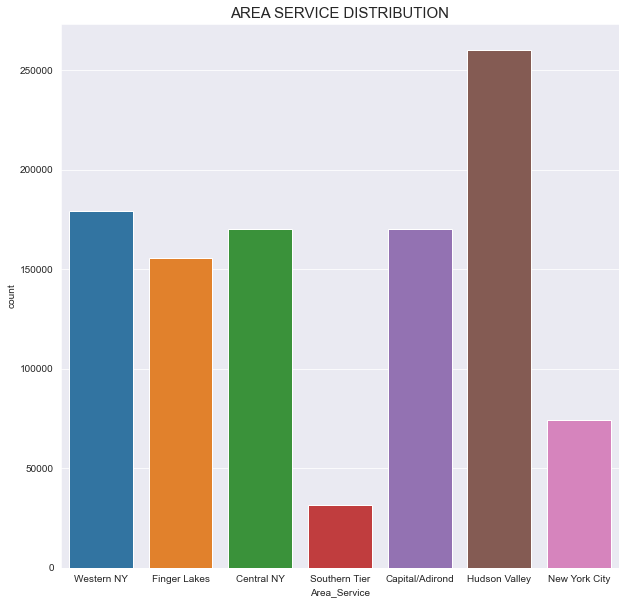

In [65]:
#1.1 Area_Service
print(output['Area_Service'].unique())
plt.figure(figsize=(10,10))
sns.countplot(x='Area_Service',data=output)
plt.title("AREA SERVICE DISTRIBUTION",size=15)
plt.show()

['Allegany' 'Cattaraugus' 'Chautauqua' 'Erie' 'Genesee' 'Niagara'
 'Orleans' 'Wyoming' 'Chemung' 'Livingston' 'Monroe' 'Ontario' 'Schuyler'
 'Steuben' 'Wayne' 'Yates' 'Oswego' 'Broome' 'Cayuga' 'Chenango'
 'Cortland' 'Herkimer' 'Jefferson' 'Lewis' 'Madison' 'Oneida' 'Onondaga'
 'St Lawrence' 'Tompkins' 'Albany' 'Clinton' 'Columbia' 'Delaware' 'Essex'
 'Franklin' 'Fulton' 'Montgomery' 'Otsego' 'Rensselaer' 'Saratoga'
 'Schenectady' 'Schoharie' 'Warren' 'Dutchess' 'Orange' 'Putnam'
 'Rockland' 'Sullivan' 'Ulster' 'Westchester' 'Bronx']


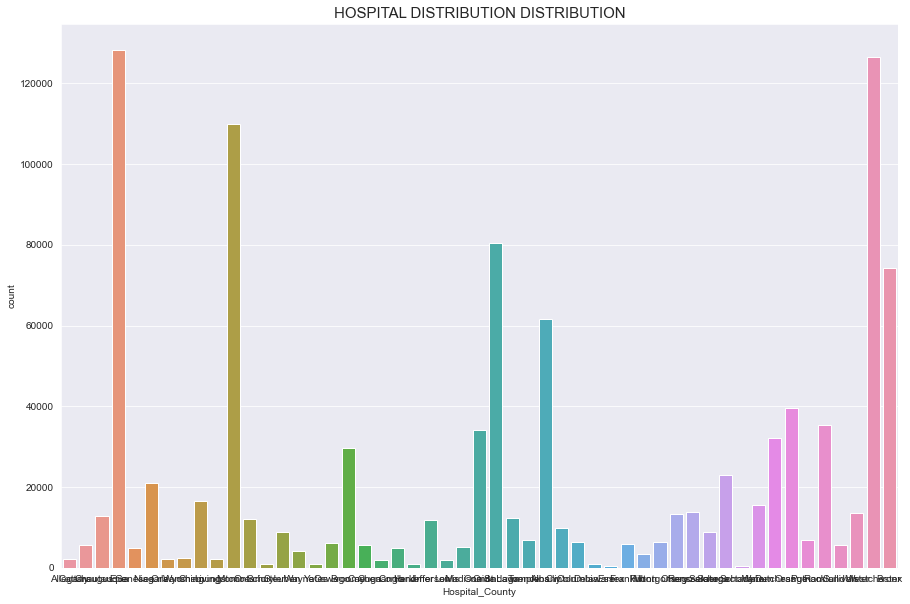

In [66]:
#1.2 Hospital_County
print(output['Hospital_County'].unique())
plt.figure(figsize=(15,10))
sns.countplot(x='Hospital_County',data=output)
plt.title("HOSPITAL DISTRIBUTION DISTRIBUTION",size=15)
plt.show()

[3.700e+01 3.900e+01 6.600e+01 9.800e+01 1.020e+02 1.030e+02 1.110e+02
 1.140e+02 2.070e+02 2.080e+02 2.100e+02 2.110e+02 2.130e+02 2.150e+02
 2.160e+02 2.180e+02 2.670e+02 2.800e+02 2.920e+02 3.390e+02 3.400e+02
 5.650e+02 5.740e+02 5.810e+02 5.830e+02 5.850e+02 7.180e+02 1.153e+03
 3.067e+03 1.160e+02 1.180e+02 3.930e+02 4.090e+02 4.110e+02 4.120e+02
 4.130e+02 4.140e+02 4.610e+02 4.710e+02 6.710e+02 6.760e+02 6.780e+02
 8.580e+02 8.660e+02 8.700e+02 8.730e+02 1.028e+03 1.158e+03 5.785e+03
 1.200e+01 4.200e+01 4.300e+01 5.800e+01 8.500e+01 1.280e+02 1.580e+02
 3.620e+02 3.670e+02 3.770e+02 3.790e+02 3.830e+02 3.970e+02 4.010e+02
 5.890e+02 5.970e+02 5.980e+02 5.990e+02 6.280e+02 6.300e+02 6.350e+02
 6.360e+02 7.270e+02 7.980e+02 8.040e+02 8.120e+02 8.150e+02 8.170e+02
 9.770e+02 9.059e+03 1.000e+00 2.000e+00 4.000e+00 5.000e+00 1.350e+02
 1.460e+02 1.650e+02 1.700e+02 1.740e+02 3.030e+02 3.090e+02 3.240e+02
 3.250e+02 3.300e+02 4.820e+02 4.840e+02 7.390e+02 7.460e+02 7.550e+02
 7.560

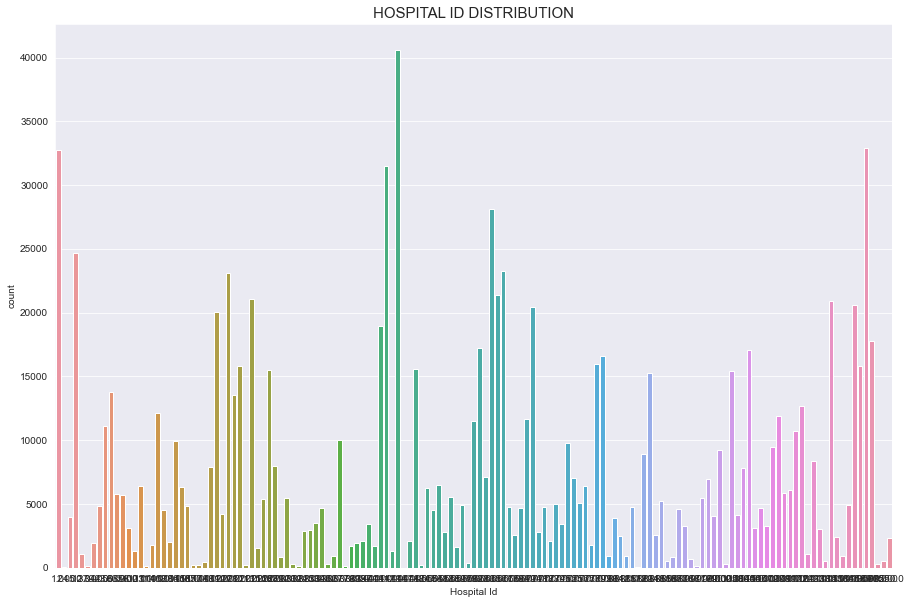

In [67]:
#1.3 Hospital Id
print(output['Hospital Id'].unique())
plt.figure(figsize=(15,10))
sns.countplot(x='Hospital Id',data=output)
plt.title("HOSPITAL ID DISTRIBUTION",size=15)
plt.show()

['30 to 49' '70 or Older' '0 to 17' '18 to 29' '50 to 69']


<AxesSubplot:xlabel='Age', ylabel='count'>

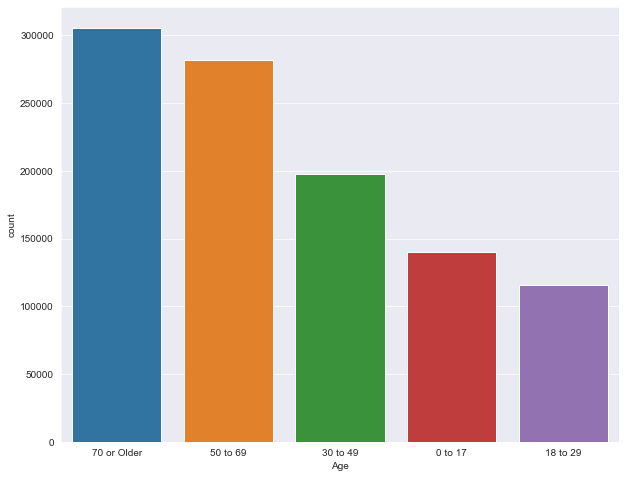

In [68]:
#1.4 Age
print(output['Age'].unique())
plt.figure(figsize=(10,8))
sns.countplot(x='Age',data=output,order=output.Age.value_counts().index)

['F' 'M' 'U']


<AxesSubplot:xlabel='Gender', ylabel='count'>

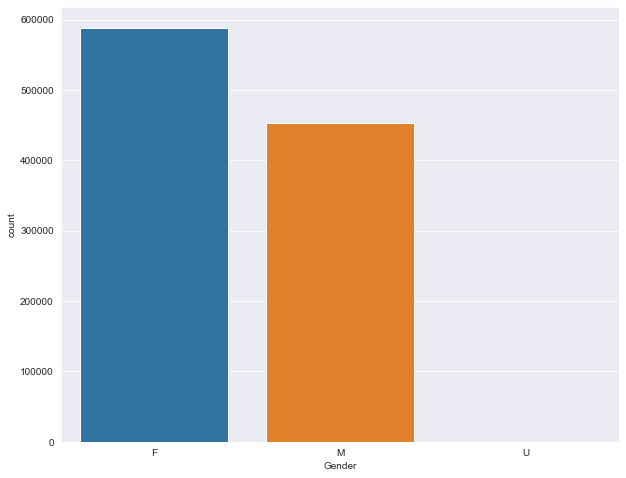

In [69]:
#1.5 Gender
print(output['Gender'].unique())
plt.figure(figsize=(10,8))
sns.countplot(x='Gender',data=output)

['Not Span/Hispanic' 'Spanish/Hispanic' 'Unknown']


<AxesSubplot:xlabel='ethnicity', ylabel='count'>

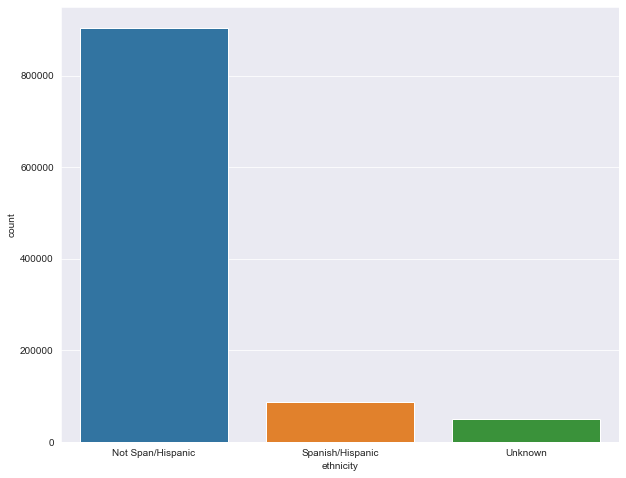

In [70]:
#1.6 ethnicity
print(output['ethnicity'].unique())
plt.figure(figsize=(10,8))
sns.countplot(x='ethnicity',data=output)

['Elective' 'Urgent' 'Emergency' 'Newborn' 'Not Available' 'Trauma']


<AxesSubplot:xlabel='Admission_type', ylabel='count'>

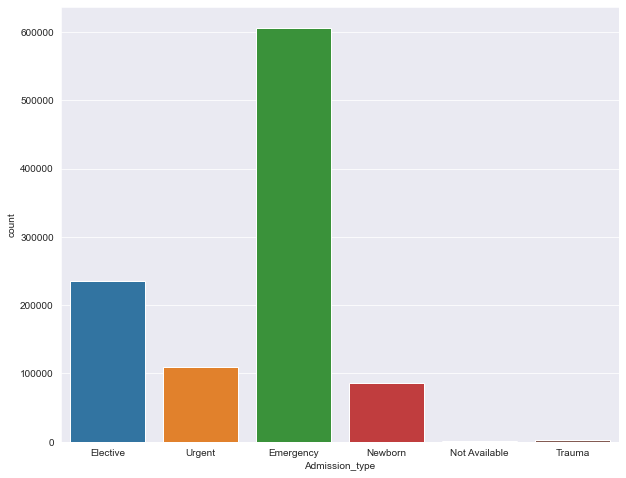

In [71]:
#1.7 Admission_type
print(output['Admission_type'].unique())
plt.figure(figsize=(10,8))
sns.countplot(x='Admission_type',data=output)

['Home or Self Care' 'Short-term Hospital'
 'Hosp Basd Medicare Approved Swing Bed'
 'Facility w/ Custodial/Supportive Care' 'Skilled Nursing Home' 'Expired'
 'Left Against Medical Advice' 'Home w/ Home Health Services'
 'Psychiatric Hospital or Unit of Hosp' 'Hospice - Home'
 'Hospice - Medical Facility' 'Federal Health Care Facility'
 'Inpatient Rehabilitation Facility'
 "Cancer Center or Children's Hospital" 'Court/Law Enforcement'
 'Medicare Cert Long Term Care Hospital' 'Another Type Not Listed'
 'Critical Access Hospital' 'Medicaid Cert Nursing Facility']


<AxesSubplot:xlabel='Home_or_self_care', ylabel='count'>

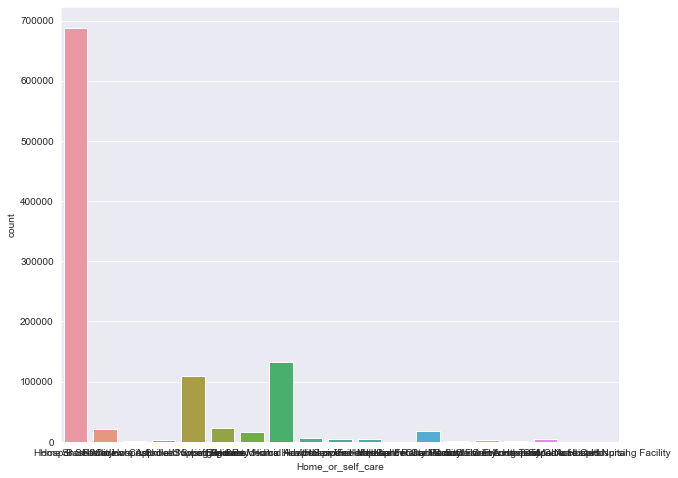

In [72]:
#1.8 Home or self care
print(output['Home_or_self_care'].unique())
plt.figure(figsize=(10,8))
sns.countplot(x='Home_or_self_care',data=output,orient='h')

['Medical' 'Surgical']


<AxesSubplot:xlabel='Surg_Description', ylabel='count'>

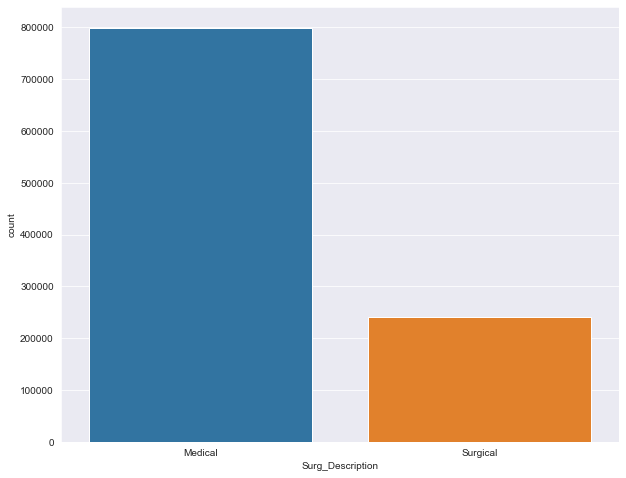

In [73]:
#1.7 Surg_Description 
print(output['Surg_Description'].unique())
plt.figure(figsize=(10,8))
sns.countplot(x='Surg_Description',data=output)

['Y' 'N']


<AxesSubplot:xlabel='Emergency_dept', ylabel='count'>

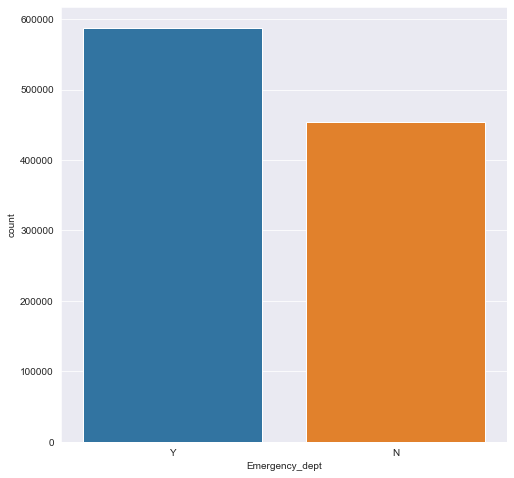

In [74]:
#1.8 Emergency_dept 
print(output['Emergency_dept'].unique())
plt.figure(figsize=(8,8))
sns.countplot(x='Emergency_dept',data=output)

[1 0]


<AxesSubplot:xlabel='Result', ylabel='count'>

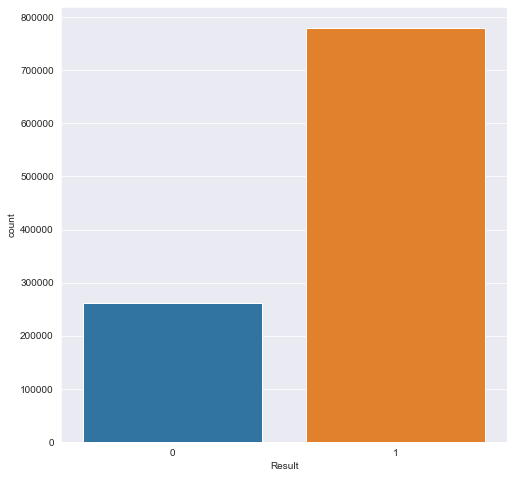

In [75]:
#1.9 Result
print(output['Result'].unique())
plt.figure(figsize=(8,8))
sns.countplot(x='Result',data=output)

[1 2 3 4 5]


<AxesSubplot:xlabel='Payment_Typology', ylabel='count'>

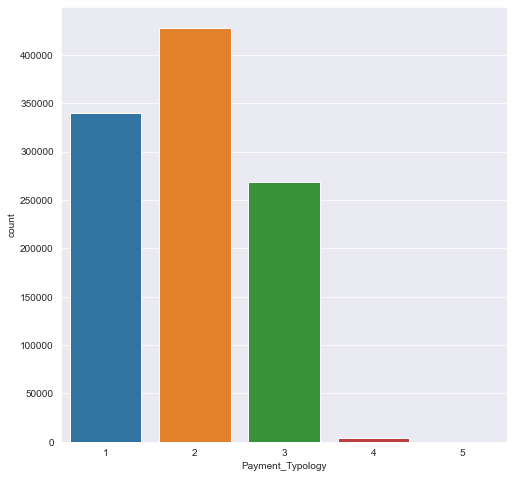

In [76]:
#1.10 Payment_Typology
print(output['Payment_Typology'].unique())
plt.figure(figsize=(8,8))
sns.countplot(x='Payment_Typology',data=output)

#### Q: Find the relation between age and fraud?
- As 0 - fraud claim and 1- genuine claim
- As the age is more the genuine claims are more as well as the fraud claims are more.
- When comparing the genuine and fraud claims ,genuine claims are more when compared to fraud claims

Text(0.5, 1.0, 'BASED ON AGE GROUP VISUVALIZE THE GENUINE AND FRAUD CLAIMS')

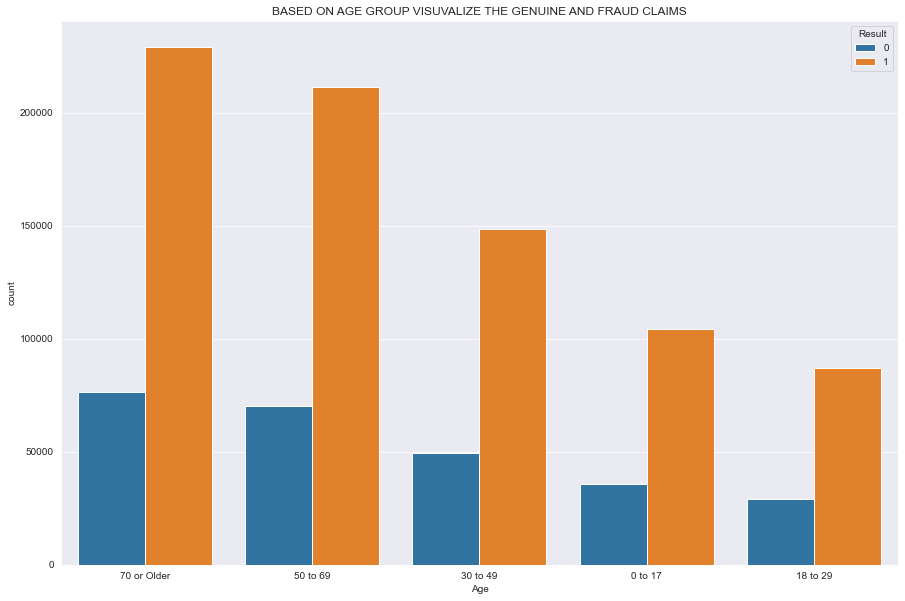

In [77]:
plt.figure(figsize=(15,10))
sns.countplot(x='Age',data=output,hue='Result',order=output.Age.value_counts().index)
plt.title("BASED ON AGE GROUP VISUVALIZE THE GENUINE AND FRAUD CLAIMS",)

### Q: How is payment topology related to result

Text(0.5, 1.0, 'BASED ON PAYMENT TOPOLOGY GROUP VISUVALIZE THE GENUINE AND FRAUD CLAIMS')

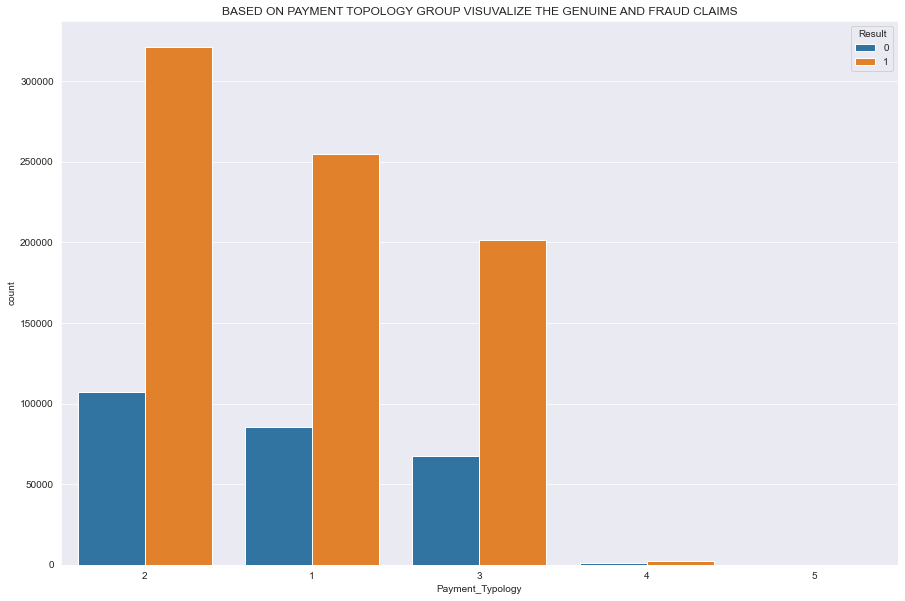

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='Payment_Typology',data=output,hue='Result',order=output.Payment_Typology.value_counts().index)
plt.title("BASED ON PAYMENT TOPOLOGY GROUP VISUVALIZE THE GENUINE AND FRAUD CLAIMS",)

### Q: Relation between type of andmission and emergency dept?

Text(0.5, 1.0, 'BASED ON ADMISSION TYPE VISUVALIZE THE EMERGENCY DEPT CASES')

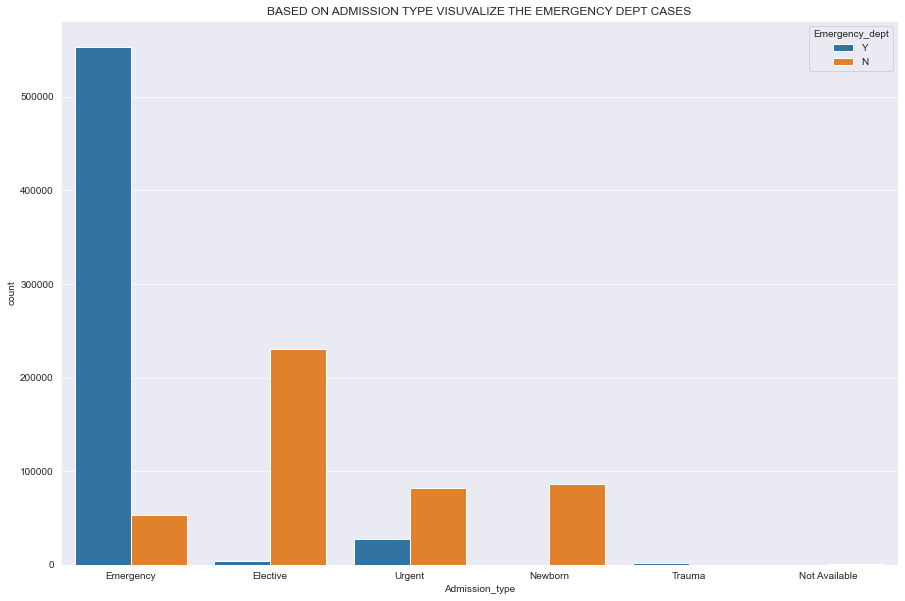

In [79]:
plt.figure(figsize=(15,10))
sns.countplot(x='Admission_type',data=output,hue='Emergency_dept',order=output.Admission_type.value_counts().index)
plt.title("BASED ON ADMISSION TYPE VISUVALIZE THE EMERGENCY DEPT CASES",)

### Q: BY USING PIE CHART VISUVALIZE THE DATA.

### 2. PIE CHART

- A pie chart shows the relationships of parts to the whole for a variable. 
- Pie charts help you understand the parts-to-a-whole relationship.
- Pie charts are used for nominal or categorical data. 

1    780361
0    260904
Name: Result, dtype: int64


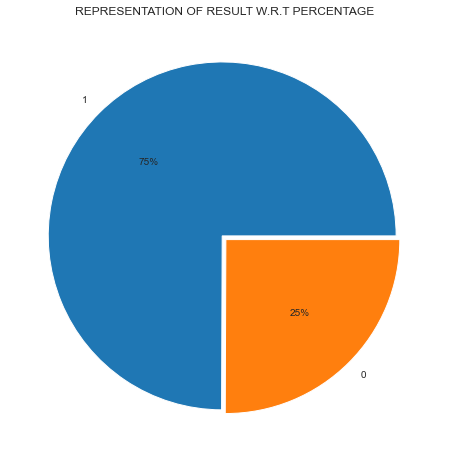

In [80]:
# 1.Result
print(output['Result'].value_counts())
plt.figure(figsize=(8,8))
plt.pie(x = output['Result'].value_counts(),labels=[1,0],autopct='%1.0f%%', labeldistance=1.1,explode=[0.02,0.01],shadow=False)
plt.title("REPRESENTATION OF RESULT W.R.T PERCENTAGE")
plt.show()


70 or Older    305802
50 to 69       281714
30 to 49       197730
0 to 17        140040
18 to 29       115979
Name: Age, dtype: int64


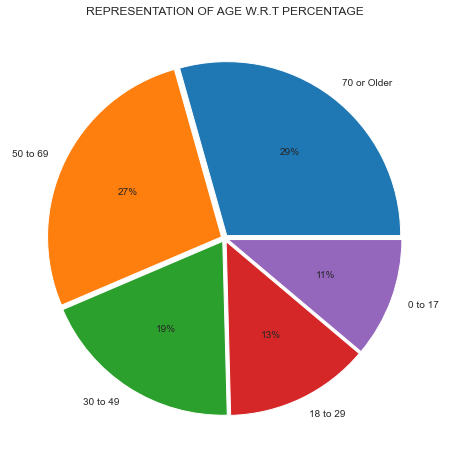

In [81]:
#2.AGE
print(output['Age'].value_counts())
plt.figure(figsize=(8,8))
plt.pie(x = output['Age'].value_counts(),labels=[ '70 or Older','50 to 69','30 to 49','18 to 29','0 to 17'],autopct='%1.0f%%', labeldistance=1.1,explode=[0.02,0.02,0.02,0.02,0.02],shadow=False)
plt.title("REPRESENTATION OF AGE W.R.T PERCENTAGE")
plt.show()

F    588585
M    452653
U        27
Name: Gender, dtype: int64


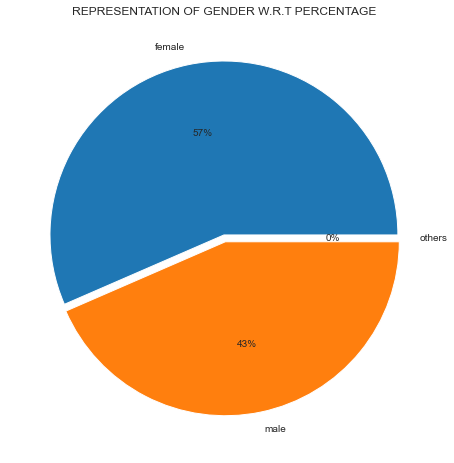

In [82]:
#3.Gender
print(output['Gender'].value_counts())
plt.figure(figsize=(8,8))
plt.pie(x = output['Gender'].value_counts(),labels=['female','male','others'],autopct='%1.0f%%', labeldistance=1.1,explode=[0.02,0.02,0.02],shadow=False)
plt.title("REPRESENTATION OF GENDER W.R.T PERCENTAGE")
plt.show()

2    428217
1    340415
3    269067
4      3500
5        66
Name: Payment_Typology, dtype: int64


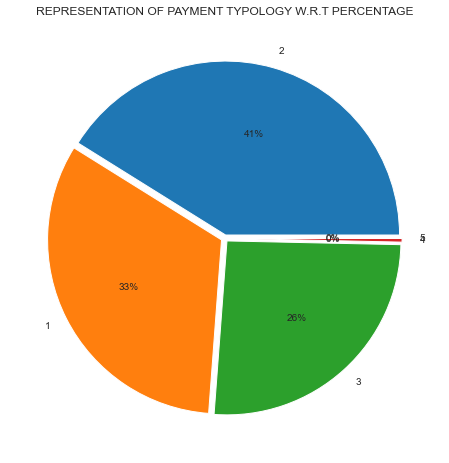

In [83]:
#4.Payment_Typology
print(output['Payment_Typology'].value_counts())
plt.figure(figsize=(8,8))
plt.pie(x = output['Payment_Typology'].value_counts(),labels=['2','1','3','4','5'],autopct='%1.0f%%', labeldistance=1.1,explode=[0.02,0.02,0.02,0.02,0.02],shadow=False)
plt.title("REPRESENTATION OF PAYMENT TYPOLOGY W.R.T PERCENTAGE")
plt.show()

### Q: BY USING HISTOGRAM  VISUVALIZE THE DATA

#### 3. HISTOGRAM

- HISTOGRAM TAKES CONTINUOUS DATA

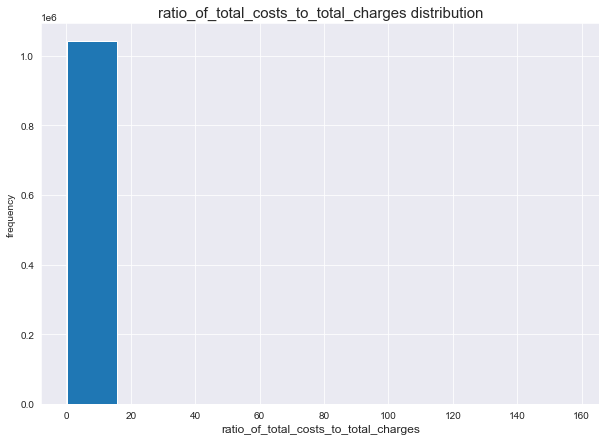

In [84]:
#ratio_of_total_costs_to_total_charges
plt.figure(figsize=(10,7))
plt.hist(x='ratio_of_total_costs_to_total_charges',data=output)
plt.xlabel("ratio_of_total_costs_to_total_charges",size=12)
plt.ylabel('frequency')
plt.title("ratio_of_total_costs_to_total_charges distribution",size=15)
plt.show()

In [85]:
# HERE THE DATA IS NOT CONTINUOUS 

### Q: VISUVALIZE THE DATA USING THE BOXPLOT

### BOXPLOT
- BOXPLOT CAN BE USED FOR BOTH UNIVARIATE ANALYSIS AND BIVARIATE ANALYSIS
- WHEN BOXPLOT IS USED FOR UNIVARIATE ANALYSIS WE USE CONTINUOUS DATA

<AxesSubplot:xlabel='Age', ylabel='Payment_Typology'>

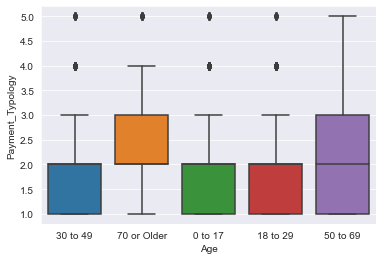

In [86]:
sns.boxplot(x='Age',y='Payment_Typology',data=output)

<AxesSubplot:xlabel='Mortality risk'>

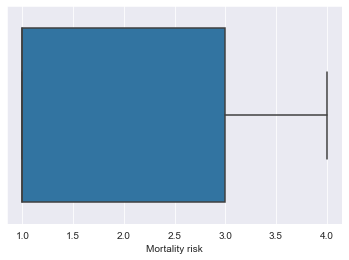

In [87]:
#Mortality risk
sns.boxplot(x='Mortality risk',data=output)

## ========> BIVARIATE ANALYSIS

### Q: VISUVALIZE THE DATA  USING SCATTER PLOT

#### SCATTER PLOT
- Here in scatterplot both the x-axis and y-axis must be continous
- To understand the relationship between two features

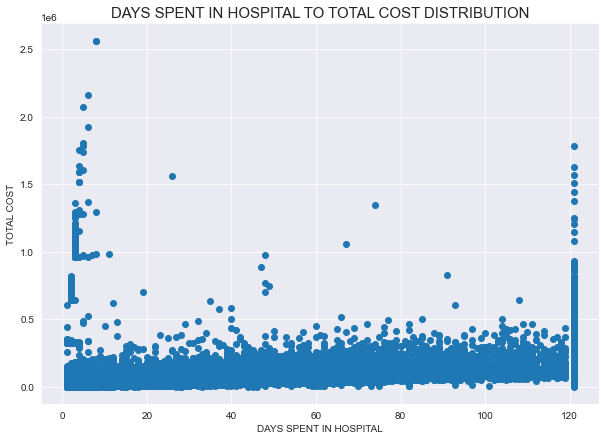

In [88]:
#1. DAYS SPENT IN HOSPITAL TO TOTAL COST DISTRIBUTION
plt.figure(figsize=(10,7))
plt.scatter(x='Days_spend_hsptl',y='Tot_cost',data=output)
plt.xlabel("DAYS SPENT IN HOSPITAL")
plt.ylabel("TOTAL COST")
plt.title("DAYS SPENT IN HOSPITAL TO TOTAL COST DISTRIBUTION",size=15)
plt.show()

====> THE ABOVE DATA IS NOT RELATED TO EACH OTHER

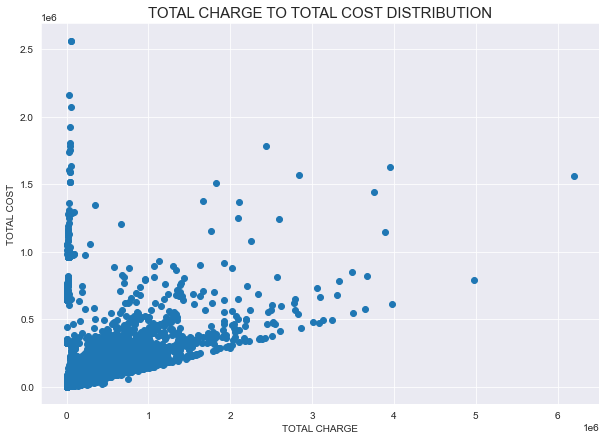

In [89]:
#2. TOTAL CHARGE TO TOTAL COST DISTRIBUTION
plt.figure(figsize=(10,7))
plt.scatter(x='Tot_charg',y='Tot_cost',data=output)
plt.xlabel("TOTAL CHARGE")
plt.ylabel("TOTAL COST")
plt.title("TOTAL CHARGE TO TOTAL COST DISTRIBUTION",size=15)
plt.show()

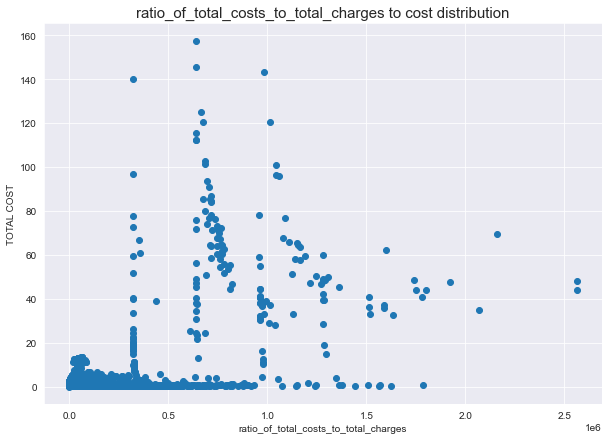

In [90]:
#3. ratio_of_total_costs_to_total_charges to cost distribution
plt.figure(figsize=(10,7))
plt.scatter(y='ratio_of_total_costs_to_total_charges',x='Tot_cost',data=output)
plt.xlabel("ratio_of_total_costs_to_total_charges")
plt.ylabel("TOTAL COST")
plt.title("ratio_of_total_costs_to_total_charges to cost distribution",size=15)
plt.show()

#=====>THERE IS NOT MUCH  RELATIONSHIP BETWEEN THE TWO VARIABLES

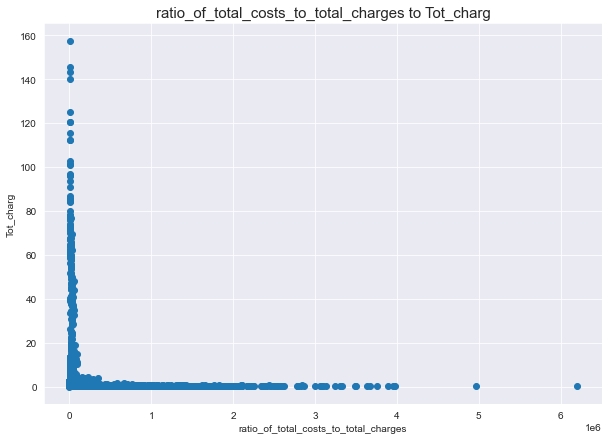

In [91]:
#4. ratio_of_total_costs_to_total_charges to Tot_charg distribution
plt.figure(figsize=(10,7))
plt.scatter(y='ratio_of_total_costs_to_total_charges',x='Tot_charg',data=output)
plt.xlabel("ratio_of_total_costs_to_total_charges")
plt.ylabel("Tot_charg")
plt.title("ratio_of_total_costs_to_total_charges to Tot_charg",size=15)
plt.show()

#====>THERE IS NOT MUCH RELATIONSHIP BETWEEN TWO VARIABLES

### BOXPLOT OF TWO VARIABLE ANALYSIS

<AxesSubplot:xlabel='Gender', ylabel='Payment_Typology'>

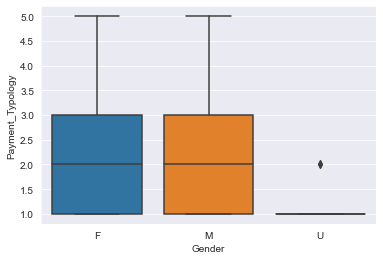

In [92]:
#1. RELATION BETWEEN GENDER AND PAYMENT TYPOLOGY
sns.boxplot(x='Gender',y='Payment_Typology',data=output)

<AxesSubplot:xlabel='Result', ylabel='Payment_Typology'>

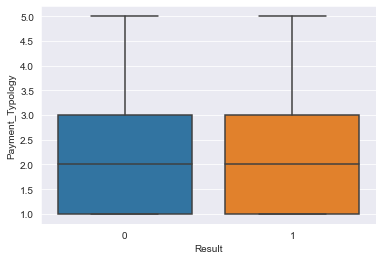

In [93]:
#2. RELATION BETWEEN RESULT AND PAYMENT TYPOLOGY
sns.boxplot(x='Result',y='Payment_Typology',data=output)

#### Q: VISUVALIZE THE DATA USING BARPLOT

#### BAR PLOT

- IN BAR PLOT X-AXIS  SHOULD BE DISCRETE DATA AND Y-AXIS TAKES CONTINUOUS DATA

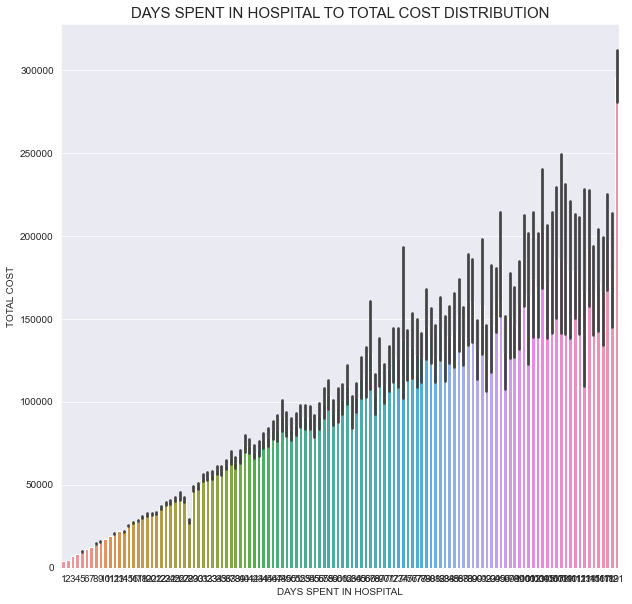

In [94]:
#1. RELATION BETWEEN DAYS SPENT IN HOSPITAL TO TOTAL COST DISTRIBUTION
plt.figure(figsize=(10,10))
sns.barplot(x='Days_spend_hsptl',y='Tot_cost',data=output)
plt.xlabel("DAYS SPENT IN HOSPITAL")
plt.ylabel("TOTAL COST")
plt.title("DAYS SPENT IN HOSPITAL TO TOTAL COST DISTRIBUTION",size=15)
plt.show()

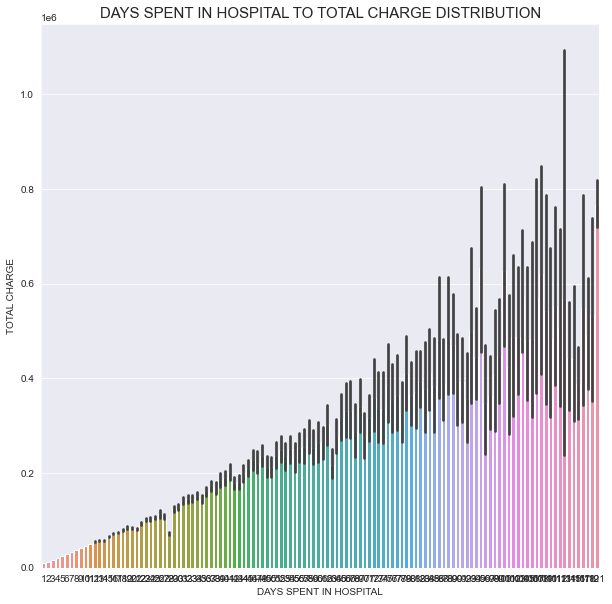

In [95]:
#2. RELATION BETWEEN DAYS SPENT IN HOSPITAL TO TOTAL CHARGE DISTRIBUTION
plt.figure(figsize=(10,10))
sns.barplot(x='Days_spend_hsptl',y='Tot_charg',data=output)
plt.xlabel("DAYS SPENT IN HOSPITAL")
plt.ylabel("TOTAL CHARGE")
plt.title("DAYS SPENT IN HOSPITAL TO TOTAL CHARGE DISTRIBUTION",size=15)
plt.show()

### MULTI VARIANT ANALYSIS

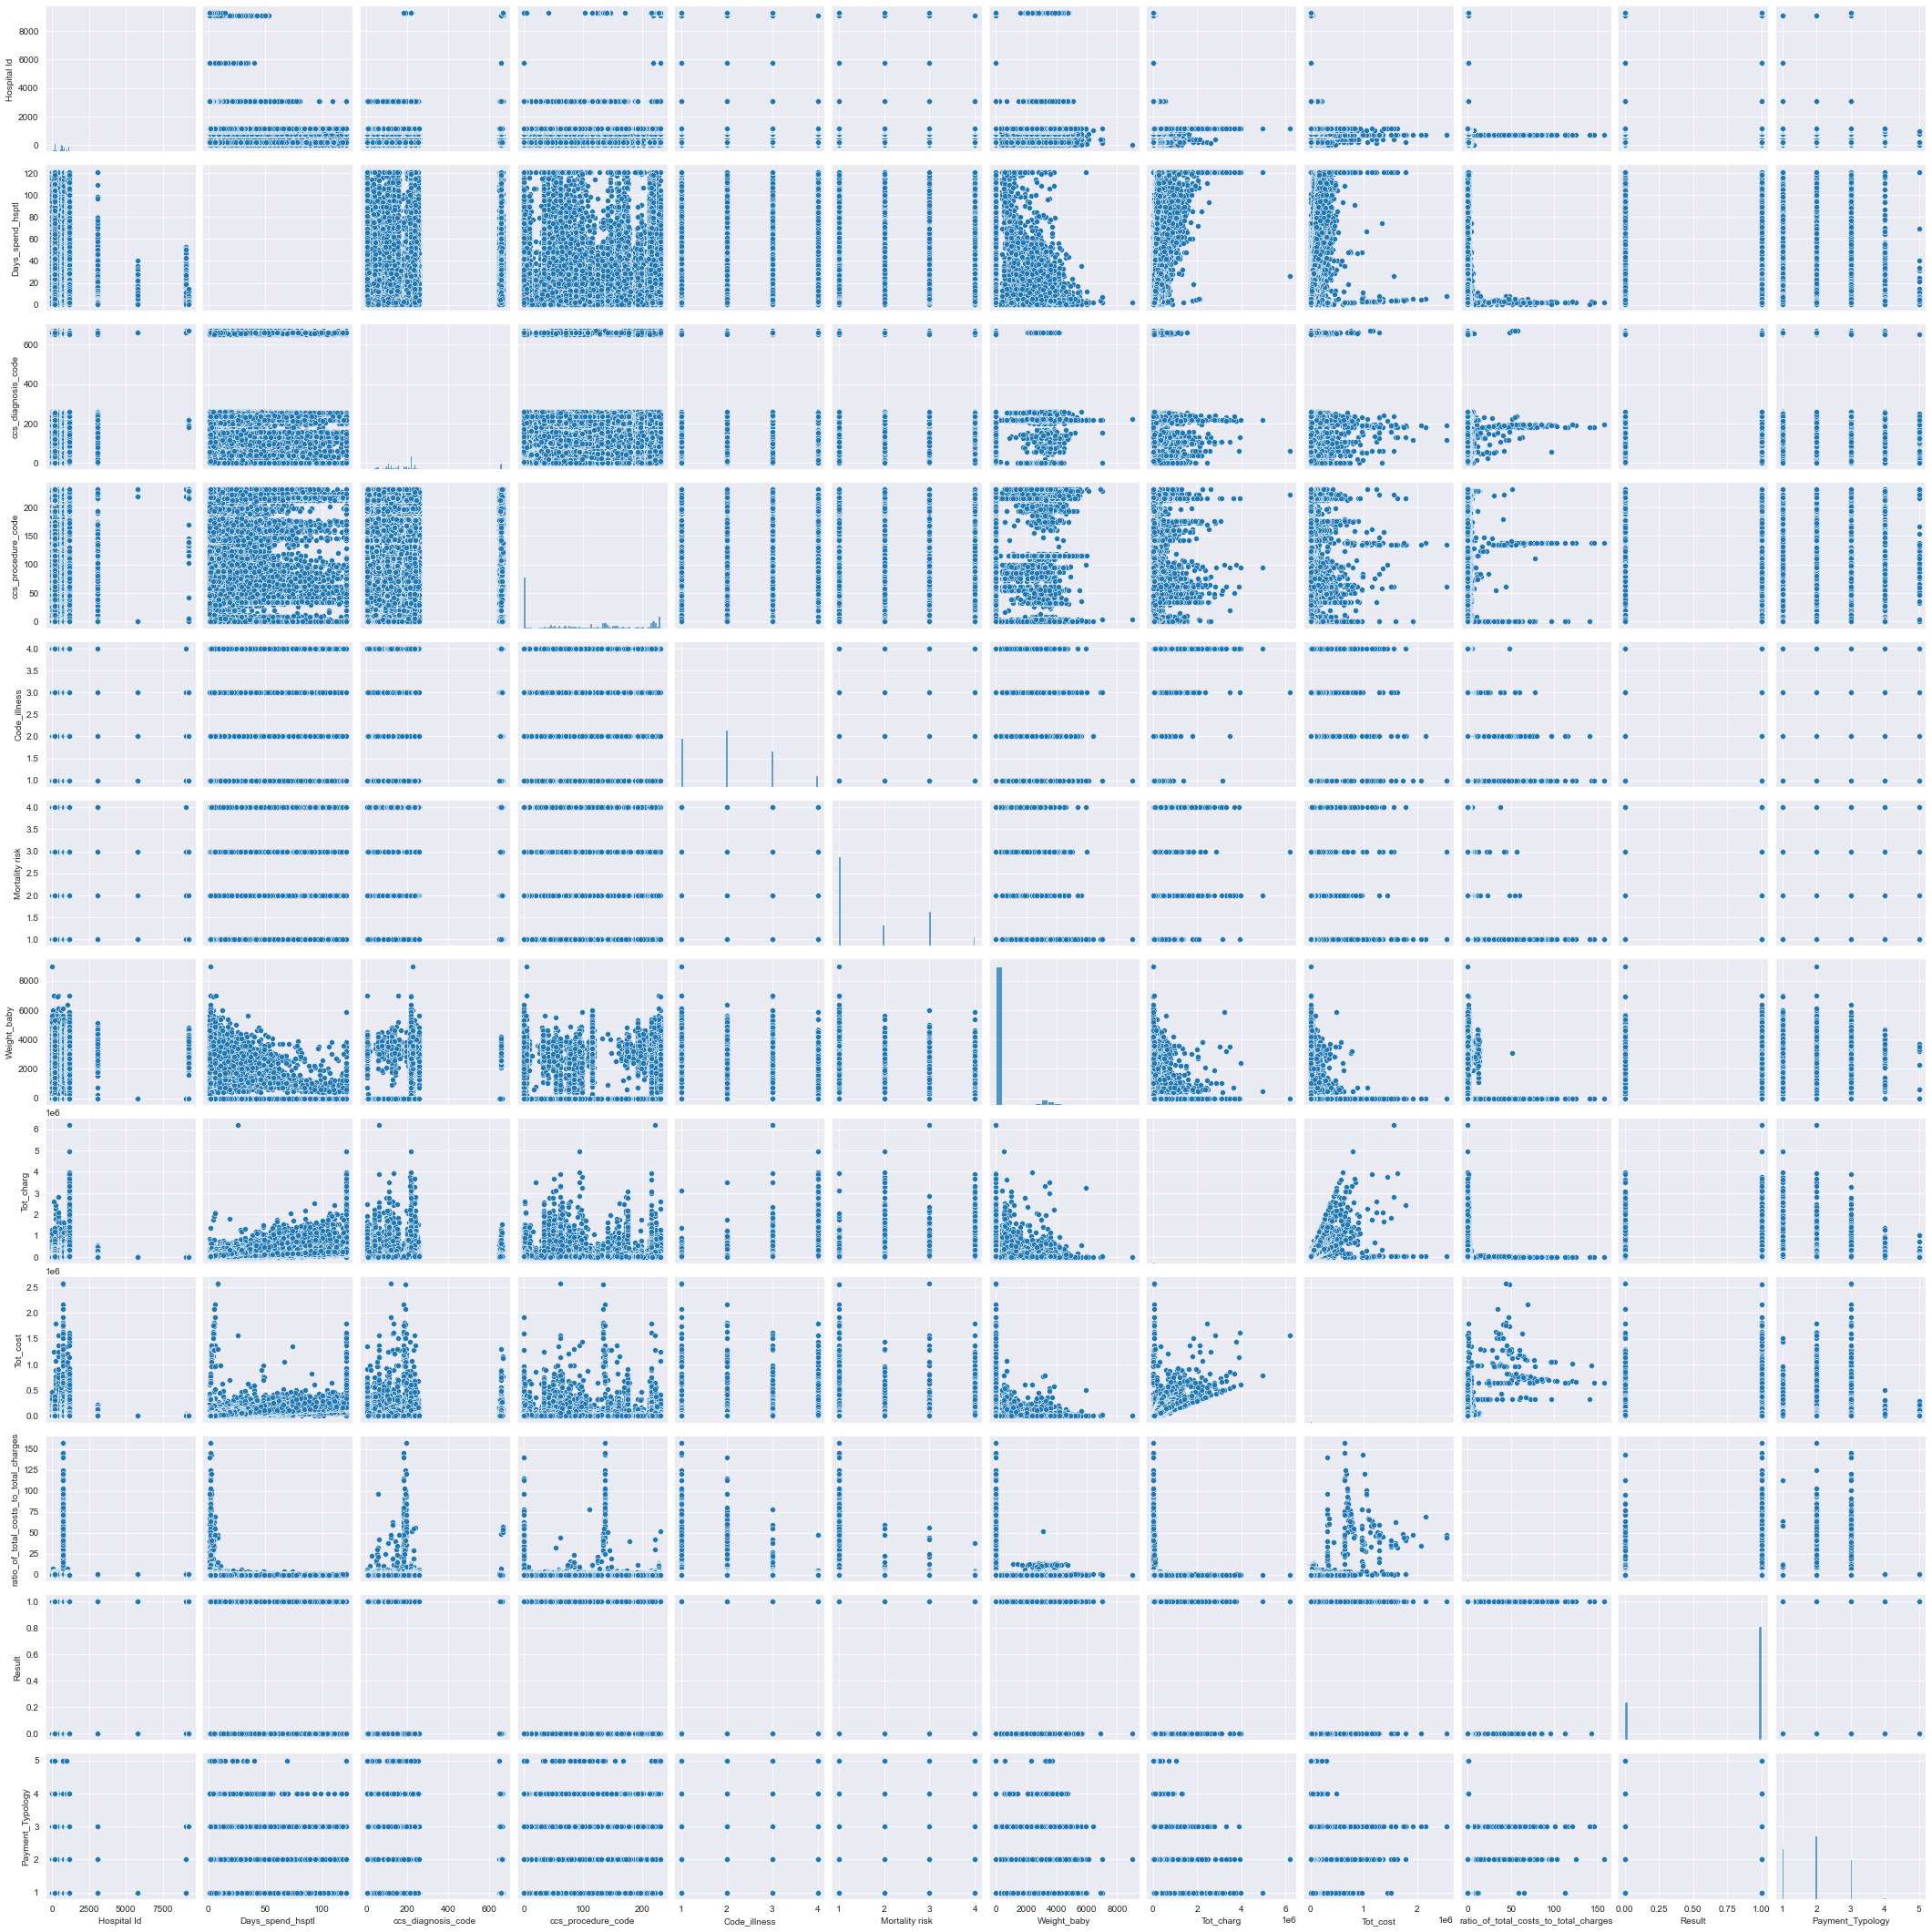

In [96]:
sns.pairplot(data=output)

### CORRELATION MATRIX

<AxesSubplot:>

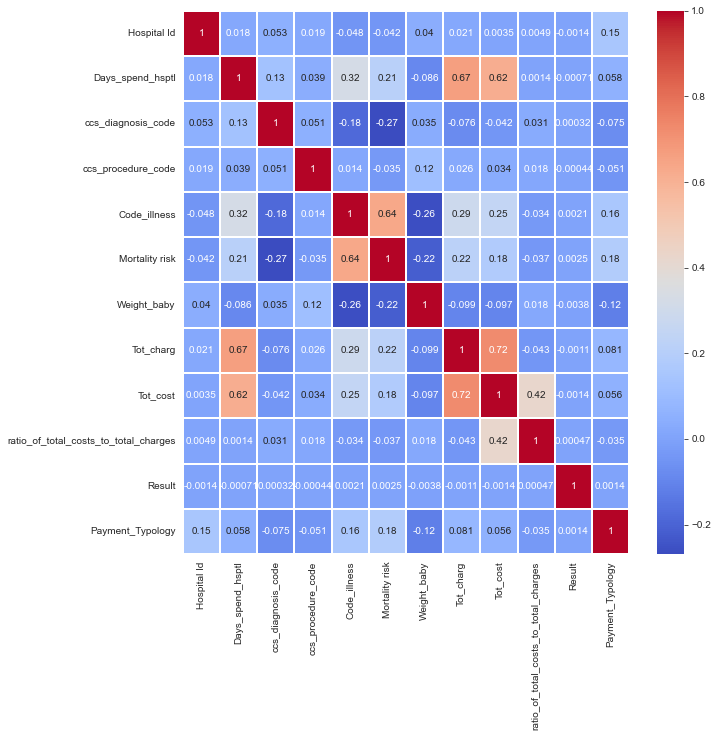

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(data=output.corr(),annot=True,linewidth=0.3,cmap='coolwarm')

## 5. PERFORM LABEL ENCODING

#### CONVERTING CATEGORICAL DATA TO NUMNERICAL DATA: PERFORMING LABEL ENCODING

In [98]:
#IMPORT LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=output
dfle.Hospital_County=le.fit_transform(dfle.Hospital_County)
dfle.Age=le.fit_transform(dfle.Age)
dfle.Gender=le.fit_transform(dfle.Gender)
dfle.Days_spend_hsptl=le.fit_transform(dfle.Days_spend_hsptl)
dfle.Admission_type=le.fit_transform(dfle.Admission_type)
dfle.apr_drg_description=le.fit_transform(dfle.apr_drg_description)
dfle.Surg_Description=le.fit_transform(dfle.Surg_Description)
dfle.Emergency_dept = le.fit_transform(dfle.Emergency_dept)
dfle.head()

,Area_Service,Hospital_County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,1,37.0,2,0,White,Not Span/Hispanic,3,0,Home or Self Care,...,1.0,0,0,N,1,5511.95,5582.49,1.012798,1,1
1,Western NY,1,37.0,4,0,White,Not Span/Hispanic,3,5,Short-term Hospital,...,2.0,0,0,N,1,4783.20,5162.82,1.079365,1,1
2,Western NY,1,37.0,2,0,White,Not Span/Hispanic,2,5,Home or Self Care,...,1.0,0,0,N,1,3829.15,4056.52,1.059379,1,1
3,Western NY,1,37.0,0,0,White,Not Span/Hispanic,0,5,Home or Self Care,...,1.0,0,0,N,1,1108.20,1644.75,1.484167,0,1
4,Western NY,1,37.0,4,0,White,Not Span/Hispanic,2,0,Home or Self Care,...,3.0,0,0,N,1,3418.18,3370.87,0.986161,1,1


In [99]:
dfle.shape

(1041265, 24)

In [100]:
dfle['outcome']=dfle['Result']
dfle

,Area_Service,Hospital_County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,outcome
0,Western NY,1,37.0,2,0,White,Not Span/Hispanic,3,0,Home or Self Care,...,0,0,N,1,5511.95,5582.49,1.012798,1,1,1
1,Western NY,1,37.0,4,0,White,Not Span/Hispanic,3,5,Short-term Hospital,...,0,0,N,1,4783.20,5162.82,1.079365,1,1,1
2,Western NY,1,37.0,2,0,White,Not Span/Hispanic,2,5,Home or Self Care,...,0,0,N,1,3829.15,4056.52,1.059379,1,1,1
3,Western NY,1,37.0,0,0,White,Not Span/Hispanic,0,5,Home or Self Care,...,0,0,N,1,1108.20,1644.75,1.484167,0,1,0
4,Western NY,1,37.0,4,0,White,Not Span/Hispanic,2,0,Home or Self Care,...,0,0,N,1,3418.18,3370.87,0.986161,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,2,1169.0,4,0,Other Race,Spanish/Hispanic,5,1,Skilled Nursing Home,...,0,0,N,1,69650.41,13896.82,0.199522,1,3,1
1048571,New York City,2,1169.0,0,0,Other Race,Not Span/Hispanic,1,1,Home or Self Care,...,0,0,N,0,13587.38,3918.35,0.288382,1,3,1
1048572,New York City,2,1169.0,3,1,Other Race,Spanish/Hispanic,12,1,Medicare Cert Long Term Care Hospital,...,0,0,N,1,104629.78,24746.64,0.236516,0,3,0
1048573,New York City,2,1169.0,2,0,Black/African American,Not Span/Hispanic,1,1,Home or Self Care,...,1,0,N,1,27521.41,6766.04,0.245846,1,3,1


In [101]:
final_ins_data=dfle.drop(["Result"],axis=1)
final_ins_data

,Area_Service,Hospital_County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology,outcome
0,Western NY,1,37.0,2,0,White,Not Span/Hispanic,3,0,Home or Self Care,...,1.0,0,0,N,1,5511.95,5582.49,1.012798,1,1
1,Western NY,1,37.0,4,0,White,Not Span/Hispanic,3,5,Short-term Hospital,...,2.0,0,0,N,1,4783.20,5162.82,1.079365,1,1
2,Western NY,1,37.0,2,0,White,Not Span/Hispanic,2,5,Home or Self Care,...,1.0,0,0,N,1,3829.15,4056.52,1.059379,1,1
3,Western NY,1,37.0,0,0,White,Not Span/Hispanic,0,5,Home or Self Care,...,1.0,0,0,N,1,1108.20,1644.75,1.484167,1,0
4,Western NY,1,37.0,4,0,White,Not Span/Hispanic,2,0,Home or Self Care,...,3.0,0,0,N,1,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,2,1169.0,4,0,Other Race,Spanish/Hispanic,5,1,Skilled Nursing Home,...,3.0,0,0,N,1,69650.41,13896.82,0.199522,3,1
1048571,New York City,2,1169.0,0,0,Other Race,Not Span/Hispanic,1,1,Home or Self Care,...,1.0,0,0,N,0,13587.38,3918.35,0.288382,3,1
1048572,New York City,2,1169.0,3,1,Other Race,Spanish/Hispanic,12,1,Medicare Cert Long Term Care Hospital,...,4.0,0,0,N,1,104629.78,24746.64,0.236516,3,0
1048573,New York City,2,1169.0,2,0,Black/African American,Not Span/Hispanic,1,1,Home or Self Care,...,1.0,1,0,N,1,27521.41,6766.04,0.245846,3,1


In [102]:
final_ins_data.to_csv('C:\\Users\\PRIYANKA\\Downloads.csv')

=====>  TILL HERE THE EDA IS PERFORMED AND LABEL ENCODING IS PERFORMED.


=====>  NEXT COMES THE MODEL BUILDING AND BY USING MODEL BUILDING,MODEL EVALUATION,MODEL TRAINING AND MODEL TESTING COME INTO PICTURE